In [1]:
from tensorflow.keras.datasets import mnist


(x, y), (x_test, y_test) = mnist.load_data()

x = x / 255.
x_test = x_test / 255.

2023-09-03 17:52:38.586909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


2023-09-03 17:52:42.709528: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 17:52:42.800345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 17:52:42.800586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

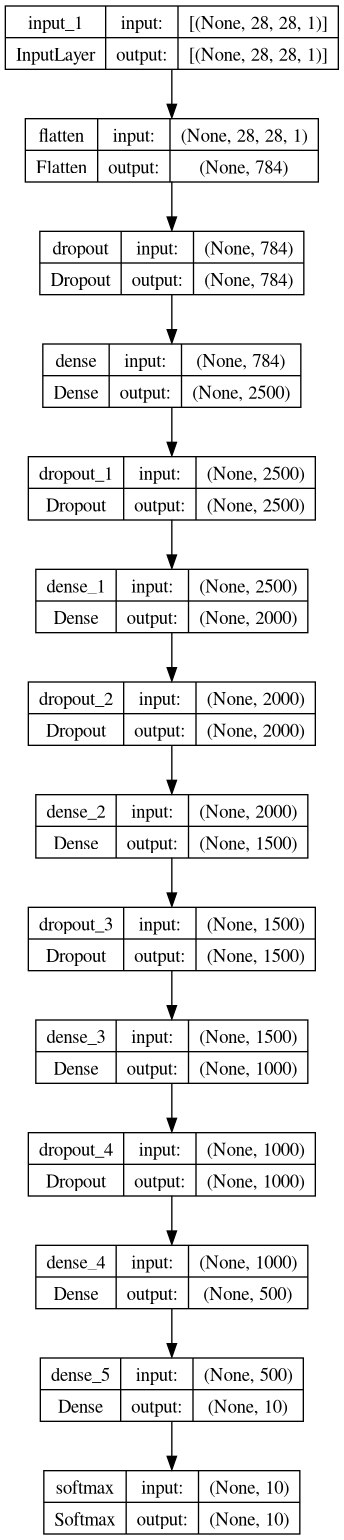

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    
    layers.Dropout(1/3),
    layers.Dense(2500, activation='relu'),
    layers.Dropout(1/3),
    layers.Dense(2000, activation='relu'),
    layers.Dropout(1/3),
    layers.Dense(1500, activation='relu'),
    layers.Dropout(1/3),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(1/3),
    layers.Dense(500, activation='relu'),

    layers.Dense(10),
    layers.Softmax()
])

model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

plot_model(model, show_shapes = True)

In [3]:
model.fit(x, y, validation_split=0.2, epochs=200)

Epoch 1/200


2023-09-03 17:52:44.182020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-03 17:52:44.256792: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556a1fba5ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-03 17:52:44.256815: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-09-03 17:52:44.280948: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-03 17:52:44.322817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-09-03 17:52:44.491347: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1500/1500 [==============================] - 9s 4ms/step - loss: 0.4404 - accuracy: 0.8727 - val_loss: 0.1873 - val_accuracy: 0.9524
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2690 - accuracy: 0.9313 - val_loss: 0.1431 - val_accuracy: 0.9666
Epoch 3/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2310 - accuracy: 0.9411 - val_loss: 0.1342 - val_accuracy: 0.9665
Epoch 4/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2069 - accuracy: 0.9481 - val_loss: 0.1289 - val_accuracy: 0.9667
Epoch 5/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1832 - accuracy: 0.9534 - val_loss: 0.1259 - val_accuracy: 0.9678
Epoch 6/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1801 - accuracy: 0.9545 - val_loss: 0.1074 - val_accuracy: 0.9748
Epoch 7/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1761 - accuracy: 0.9577 - val_loss: 0.1455 - val_accuracy: 0.96

In [4]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1601 - accuracy: 0.9824 - 521ms/epoch - 2ms/step


[0.16013604402542114, 0.9824000000953674]

## References

1.  Cireşan, D. C., Meier, U., Gambardella, L. M., & Schmidhuber, J. (2010). Deep, Big, Simple Neural Nets for Handwritten Digit Recognition. *Neural Computation*, 22(12), 3207–3220. https://doi.org/10.1162/neco_a_00052